In [24]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [35]:
df = pd.read_csv("../data/telecom-churn-datasets/churn-bigml-80.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [36]:
churn_df = df[["Total day charge","Total eve charge","Churn"]]
churn_df.head()

,Total day charge,Total eve charge,Churn
0,45.07,16.78,False
1,27.47,16.62,False
2,41.38,10.30,False
3,50.90,5.26,False
4,28.34,12.61,False


In [37]:
X = churn_df[["Total day charge","Total eve charge"]]
X.values

array([[45.07, 16.78],
       [27.47, 16.62],
       [41.38, 10.3 ],
       ...,
       [39.29, 13.04],
       [30.74, 24.55],
       [39.85, 22.6 ]], shape=(2666, 2))

In [40]:
y = churn_df["Churn"]
y.values

array([False, False, False, ..., False, False, False], shape=(2666,))

In [41]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)
print(X_train)
print("------")
print(y_train)

      Total day charge  Total eve charge
1229             46.09             14.62
2001             40.83             13.01
1421             24.48             11.54
1346             28.88             17.80
86               40.48             15.91
...                ...               ...
66               28.93             13.19
104              31.88             12.46
377              33.05             21.67
1123             34.10             24.61
1640             45.63             18.89

[2132 rows x 2 columns]
------
1229    False
2001    False
1421    False
1346    False
86      False
        ...  
66      False
104      True
377     False
1123    False
1640    False
Name: Churn, Length: 2132, dtype: bool


In [42]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [43]:
print(knn.score(X_test,y_test))

0.8614232209737828


##### Let's check the accuracy of the model over different values of k

In [45]:
neighbors = np.arange(1,13)
train_accuracies = {}
test_accuracies = {}

In [46]:
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train,y_train)
    
    train_accuracies[n] = knn.score(X_train,y_train)
    test_accuracies[n] = knn.score(X_test,y_test)

In [47]:
print(f"{neighbors} \n {train_accuracies} \n {test_accuracies}")

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {np.int64(1): 1.0, np.int64(2): 0.8977485928705441, np.int64(3): 0.9029080675422139, np.int64(4): 0.8869606003752345, np.int64(5): 0.8888367729831145, np.int64(6): 0.8841463414634146, np.int64(7): 0.8813320825515948, np.int64(8): 0.8813320825515948, np.int64(9): 0.8827392120075047, np.int64(10): 0.8822701688555347, np.int64(11): 0.8818011257035647, np.int64(12): 0.8808630393996247} 
 {np.int64(1): 0.8071161048689138, np.int64(2): 0.8707865168539326, np.int64(3): 0.8389513108614233, np.int64(4): 0.8651685393258427, np.int64(5): 0.8614232209737828, np.int64(6): 0.8707865168539326, np.int64(7): 0.8707865168539326, np.int64(8): 0.8707865168539326, np.int64(9): 0.8689138576779026, np.int64(10): 0.8726591760299626, np.int64(11): 0.8707865168539326, np.int64(12): 0.8689138576779026}


##### Let's Plot the accuracies

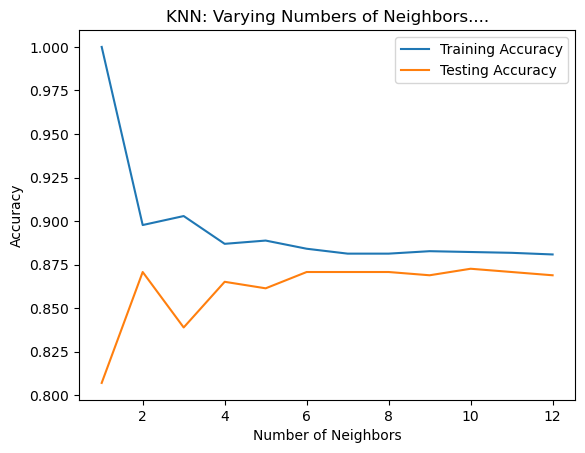

In [49]:
from matplotlib import pyplot as plt
plt.title("KNN: Varying Numbers of Neighbors....")
plt.plot(neighbors,train_accuracies.values(),label="Training Accuracy")
plt.plot(neighbors,test_accuracies.values(),label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()